In [8]:
import astropy.units as u
from specutils import Spectrum
from astrodb_utils.spectra import check_spectrum_plottable
import os
import numpy as np

In [9]:
path = "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/"

Processing Xshooter_NIR_ULASJ130710.22+151103.4.txt


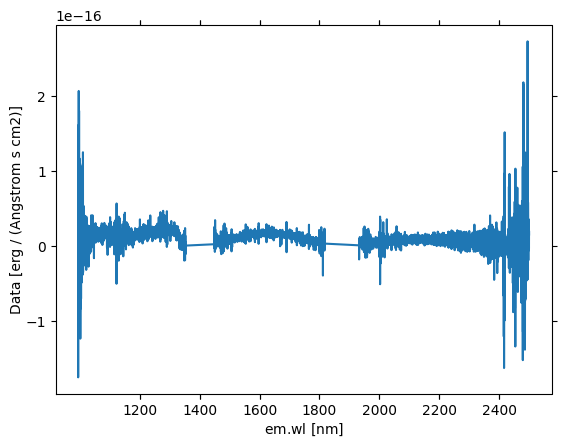

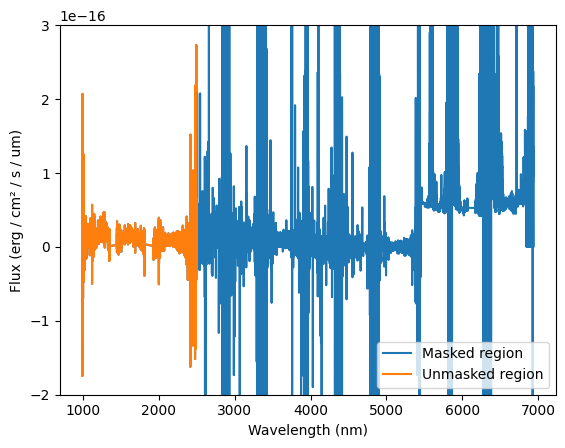

In [10]:
# Process ULASJ130710.22+151103.4, 0-2500nm is used in the research paper
import matplotlib.pyplot as plt

for filename in os.listdir(path):
    if "ULASJ130710.22+151103.4" in filename:
        print(f"Processing {filename}")
        file_path = os.path.join(path, filename)
        data = np.loadtxt(file_path, comments="#", encoding="latin1")

        # plot in research paper stops at 2500nm, line25102
        wavelength = data[:, 0] * u.nm
        flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)
        mask = np.logical_or(wavelength.value < 0, wavelength.value > 2500)

        # Create Spectrum object
        spectrum = Spectrum(
            flux=flux,
            spectral_axis=wavelength,
            mask=mask
        )
        spectrum.plot()

        fig, ax = plt.subplots()
        ax.plot(spectrum.spectral_axis, spectrum.flux, label="Masked region")
        ax.plot(spectrum.spectral_axis[~spectrum.mask], spectrum.flux[~spectrum.mask],label="Unmasked region")
        ax.legend()
        ax.set_ylim(-2e-16,3e-16)
        ax.set_xlabel("Wavelength (nm)")
        ax.set_ylabel("Flux (erg / cm² / s / um)")
        plt.show()

Processing Xshooter_NIR_ULASJ135058.85+081506.8.txt


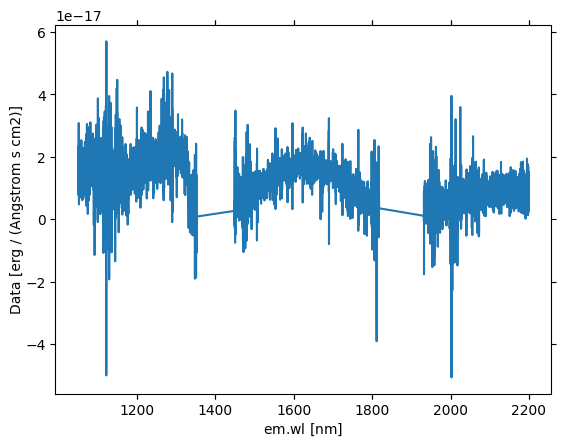

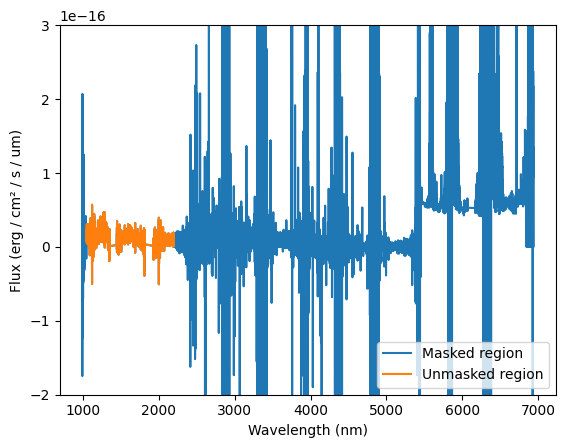

In [11]:
# Process ULASJ135058.85+081506.8.txt, ULAS J135058.86+081506.8
# imcomplete: can't find this source in the paper Burgasser et al. 2004
# Not ingesting this spectrum for now as it is not documented in the paper
from specutils.manipulation import extract_region
from specutils import Spectrum, SpectralRegion
for filename in os.listdir(path):
    if "Xshooter_NIR_ULASJ135058.85+081506.8" in filename:
        print(f"Processing {filename}")
        file_path = os.path.join(path, filename)
        data = np.loadtxt(file_path, comments="#", encoding="latin1")
        mask = np.logical_or(wavelength.value < 1050, wavelength.value > 2200)

        # Create Spectrum object
        spectrum = Spectrum(
            flux=flux,
            spectral_axis=wavelength,
            mask=mask
        )
        spectrum.plot()

        fig, ax = plt.subplots()
        ax.plot(spectrum.spectral_axis, spectrum.flux, label="Masked region")
        ax.plot(spectrum.spectral_axis[~spectrum.mask], spectrum.flux[~spectrum.mask],label="Unmasked region")
        ax.legend()
        ax.set_ylim(-2e-16,3e-16)
        ax.set_xlabel("Wavelength (nm)")
        ax.set_ylabel("Flux (erg / cm² / s / um)")
        plt.show()
